In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("D:/Python/achieves/2008.csv")
#eliminar todos los datos faltantes de las columnas a graficar(inplace)
df.dropna(inplace=True, subset=["ArrDelay", "DepDelay", "Distance", "AirTime"])

sns.set(rc={"figure.figsize":(15,10)})

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


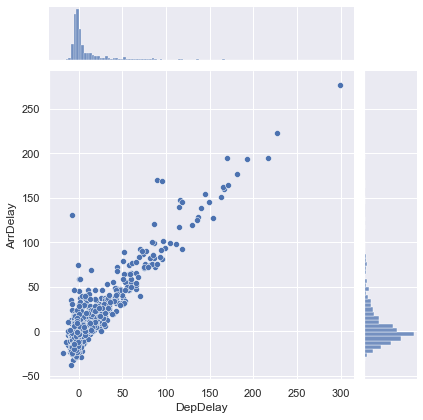

In [5]:
df2 = df[df["Origin"].isin(["ATL","HOU", "IND"])].sample(frac =1).head(1000)
#Para crear este grafico solo se necesitan dos columnas
#de un data frame
sns.jointplot(df2["DepDelay"],df2["ArrDelay"])

In [6]:
#se toman los vuelos con retraso de menos de 40 minutos
#y depues los que hayan llegado menos de 40 minutos 
#antes de tiempo
df3= df2[np.abs(df2["DepDelay"])<40]
df3 = df3[np.abs(df3["ArrDelay"])<40]


C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


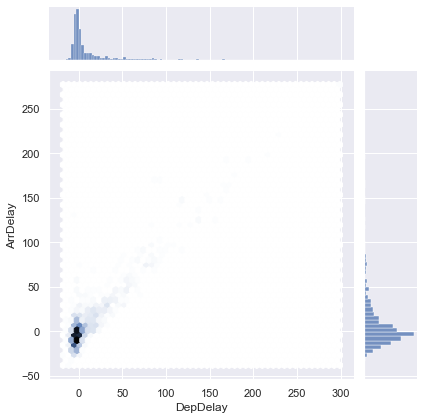

In [7]:
sns.jointplot(df2["DepDelay"], df2["ArrDelay"], kind ="hex")

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


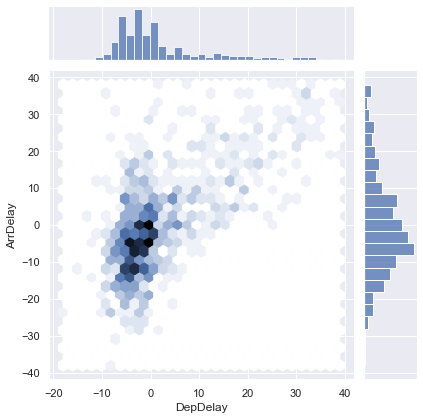

In [8]:
sns.jointplot(df3["DepDelay"], df3["ArrDelay"], kind ="hex")

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


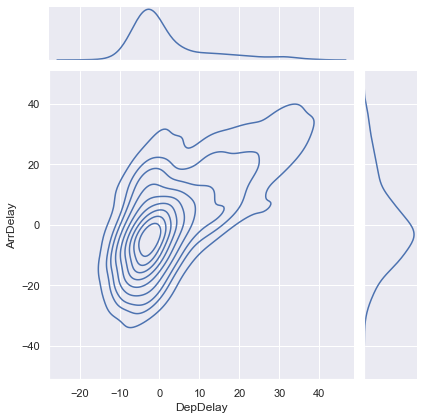

In [9]:
sns.jointplot(df3["DepDelay"], df3["ArrDelay"],kind="kde")

In [13]:
gb_df = pd.DataFrame(df2.groupby(["Origin", "Month"], as_index=False)["DepDelay"].mean())
gb_df.head(36)

,Origin,Month,DepDelay
0,ATL,1,12.033898
1,ATL,2,13.178571
2,ATL,3,15.230769
3,ATL,4,10.800000
4,ATL,5,3.208955
5,ATL,6,10.619718
6,ATL,7,20.724638
7,ATL,8,15.602941
8,ATL,9,2.466667
9,ATL,10,7.212121


In [11]:
data = gb_df.pivot("Month", "Origin", "DepDelay")
data

Origin,ATL,HOU,IND
Month,,,
1,12.033898,3.818182,-3.166667
2,13.178571,7.700000,6.333333
3,15.230769,19.375000,12.625000
4,10.800000,7.625000,3.777778
5,3.208955,13.100000,0.700000
6,10.619718,34.875000,5.600000
7,20.724638,13.000000,-0.538462
8,15.602941,11.857143,24.666667
9,2.466667,-1.666667,11.375000


<AxesSubplot:xlabel='Origin', ylabel='Month'>

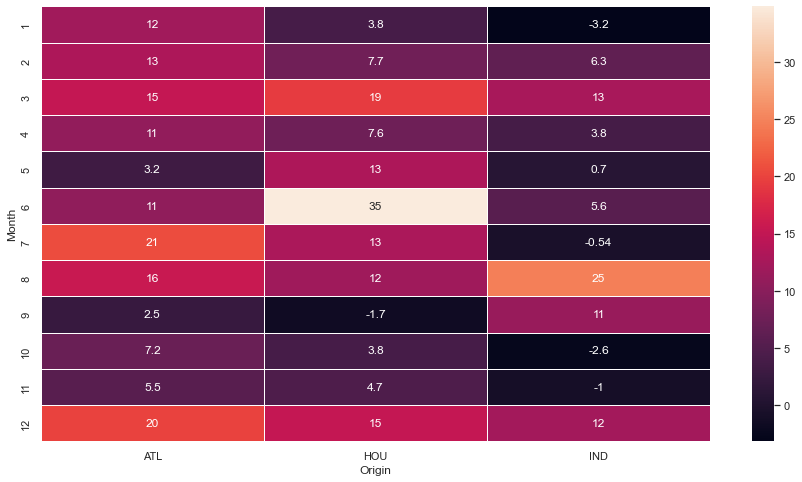

In [17]:
#annot =true muestra los valores en los cuadros
sns.set(rc={"figure.figsize":(15,8)})
sns.heatmap(data=data, annot=True, linewidths = 0.5)